In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df = pd.DataFrame(pd.read_csv('/content/train.csv'))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

* There are information of 891 passengers bassed on 12 different attributes.




In [ ]:
df.size

10692

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* From above information, we found that there are total 177, 687 and 2 missing number of information of Passengers on Age, Cabin and Embarked repectively. 

* Dropping out the column which have have 35% of the values missing, as they are of no use.

In [ ]:
drop = df.isnull().sum()[df.isnull().sum()>(35/100*df.shape[0])]
drop

Cabin    687
dtype: int64

In [ ]:
drop.index

Index(['Cabin'], dtype='object')

In [ ]:
df.drop(drop.index,axis=1,inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

* As we don't have age of some passenger, therefore we'll fill that blank age with mean of all ages we have. 

In [ ]:
df.fillna(df.mean(),inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

* Taking description of Embarked.

In [ ]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

* Filling missing values with S in Embarked.

In [ ]:
df['Embarked'].fillna('S',inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


* Fare for Passenger of 1st class was high , for 2nd class it was low and for 3rd class it was least.

* Creating new column called FamilySize from combining sibsp and parch, where

  sibsp: Number of Siblings/Spouses Abroad
  
  parch: Number of Parents/Children Abroad

In [ ]:
df['FamilySize'] = df['SibSp']+df['Parch']
df.drop(['SibSp','Parch'],axis=1,inplace=True)
df.corr()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.033207,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.331339,-0.549500,0.065997
Age,0.033207,-0.069809,-0.331339,1.000000,0.091566,-0.248512
Fare,0.012658,0.257307,-0.549500,0.091566,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,-0.248512,0.217138,1.000000


* From above we can tell that there is no   co-ralation of FamilySize with Survival.
*Also we can tell that the Survival rate of Passengers of 1st class was more , for 2nd class it was less and for 3rd class it was more less.

* Creating new column to find wheteher a person was alone or not.
* for alone , Alone=1
* for not alone , Alone=0

In [ ]:
df['Alone'] = [0 if df['FamilySize'][i]>0 else 1 for i in df.index]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,1


In [ ]:
df.groupby(['Alone'])['Survived'].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

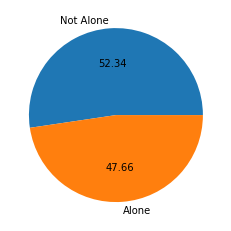

In [ ]:
data_family = df[df['Survived'] == 1]['Alone'].value_counts()
plt.pie(data_family,labels=['Not Alone','Alone'],autopct="%.2f")
plt.show()

* From above we can tell that there was more Survival rate if a person was travelling with a family rather than the person who was alone.

In [ ]:
df.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

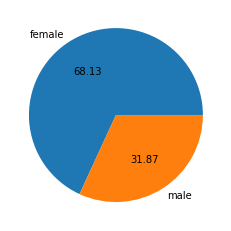

In [ ]:
data_gender = df[df['Survived'] == 1]['Sex'].value_counts()
plt.pie(data_gender,labels=['female','male'],autopct="%.2f")
plt.show()

* It shows that the Survival rate for women were higher,So we can say that Women were prioritized over men.

In [ ]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

* It shows that the survival rate for Passengers who had the Embarkation port as Cherbourg was higher, for Quenstown was less and for Southampton it was more less.

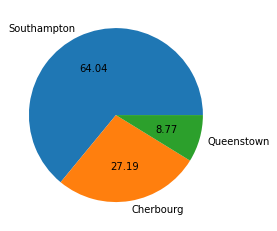

In [ ]:
data_port = df[df['Survived'] == 1]['Embarked'].value_counts()
plt.pie(data_port,labels=['Southampton','Cherbourg','Queenstown'],autopct="%.2f")
plt.show()

* It shows that the number of Passengers survived was more for Southampton,less for Cherbourg and least for Quuenstown.

* We can't take Age as parameter to find survival rate as age for most of the passengers are missing.

# * Conclusion



1.   Women were prioritized over men.
2.   Rich people had higher Survival rate than poor.The hierarichal System might have saved them.
3.   Person with family had higher survival rate.
4.   Passengers who had Embarkation port as Cherbourg had higher Survival rate.
5.   People having Southampton as Embarkation port had more Number of Survivor out of total number of Survivors.

